In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate coupled probability distribution

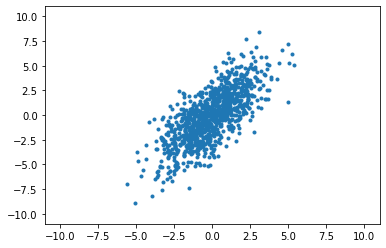

In [27]:
stretch = lambda a,b: np.array([[a, 0], [0, b]])
rot = lambda t: np.array([[np.cos(t), -np.sin(t)],[np.sin(t), np.cos(t)]])

x1 = np.random.normal(0, 1, (2, 1000))
S = stretch(3, 1)
R = rot(np.pi / 3)
x2 = R.dot(S.dot(x1))

plt.figure()
plt.scatter(*x2, marker='.')
plt.xlim(-11,11)
plt.ylim(-11,11)
plt.show()

# 2. Fit poly to log-likelihood

Model for a single datapoint

$$\lambda_0 = -2\log(P(x,y)) \approx a + bx + cy + dx^2 + ey^2 + fxy$$

Negative log-likelihood of the entire dataset

$$
\begin{align}
\bar{\lambda}
&= \frac{-2}{N}\log \Lambda \\
&= \frac{-2}{N}\log \prod_i P(x_i,y_i) \\
&= \frac{1}{N}\sum_i -2\log P(x_i,y_i) \\
&= \frac{1}{N}\sum_i (a + bx_i + cy_i + dx_i^2 + ey_i^2 + f x_i y_i) \\
&= a + b\bar{x} + c\bar{y} + d\bar{x^2} + e\bar{y^2} + f \bar{xy}
\end{align}
$$

Problems:
1. Must calculate $a$ as function of all other parameters, since it ensures normalization
    - Analytical expression exists in bivariate 2D case, but unsure about multivariate 2D and 3D cases, likely not
2. PDF may not be normalizable at all
    - In 2D case ok as long as all quadratic terms are positive.
    - In 3D case the 2D terms can be anything as long as 3D terms are negative.
    - What are the constraints on the coupling terms?
    
TODO:
* Check how Amari solves above for discrete. Are these the very problems that stop application to continuous?

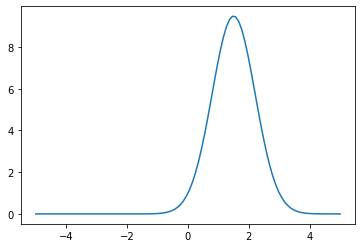

In [35]:
x = np.linspace(-5, 5, 100)
y = np.exp(-x**2 + 3*x)

plt.figure()
plt.plot(x,y)
plt.show()